# ML - Final Assignment
#### By Christopher Bishop (#500791964), Paul Boutot (#500741332) & Joseph Grgic (#XXXXXXXXX)


# Project Description
This project is about categrozing food images similair to that of assignment 2. Inspired by the [SeeFood App in the show Sillicon Valley](https://www.youtube.com/watch?v=vIci3C4JkL0), we hope to do better than Jian Yang and not just identify if Hotdog or Not Hotdog, we want to correctly identefy each type of the over 100 foods in the data set.  

# Import Packages

In [35]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

# Setup Datasets

In [2]:
# Files
training_file = 'food_c101_n10099_r64x64x3.h5'  # Can also use food_c101_n10099_r64x64x3.h5 if we want a bigger data set
test_file = 'food_test_c101_n1000_r64x64x3.h5'

# Gets the path to the Files
training_path = os.path.join('..', 'data', training_file)
testing_path = os.path.join('..', 'data', test_file)

# Opens the files as readonly
h5f_training = h5py.File(training_path, 'r')
h5f_testing = h5py.File(testing_path, 'r')

# Gets the features
X_training = h5f_training['images'][()]  # [()] is the same as .values - .values is deprecated for h5 files
X_testing = h5f_testing['images'][()]

# Gets the shape
X_shape = X_training.shape[1:]

# Gets the labels
y_training = h5f_training['category'][()]
y_testing = h5f_testing['category'][()]  # Columns of true or false based on label - ie. True and False Matrix from A2

# Gets the shape
y_shape = y_training.shape[1:]

# Prints the size
print("------------------------------------")
print("Training X Data: ", X_training.shape)
print("Training y Data: ", y_training.shape)
print("------------------------------------")
print("Testing X Data:  ", X_testing.shape)
print("Testing y Data:  ", y_testing.shape)
print("------------------------------------")

# List of all Labels in the data (ie Apple Pie, Donuts, Pizza, Waffles...)
labels = []
for label in h5f_training['category_names'][:]:
    labels.append(label.decode())
print("Number of Labels - Y Data: ", len(labels))

print("------------------------------------")

print(X_shape)
print(y_shape)


------------------------------------
Training X Data:  (10099, 64, 64, 3)
Training y Data:  (10099, 101)
------------------------------------
Testing X Data:   (1000, 64, 64, 3)
Testing y Data:   (1000, 101)
------------------------------------
Number of Labels - Y Data:  101
------------------------------------
(64, 64, 3)
(101,)


# Helper Functions

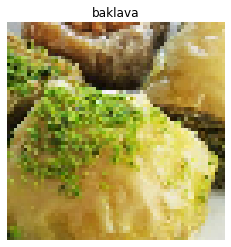

In [3]:
# Displays an image
def displayImage(images, categories, index):
    sample = images[index, :]
    plt.imshow(sample if sample.shape[2]==3 else sample[:,:,0], cmap = 'gray')
    plt.axis('off')
    plt.title(labels[np.argmax(categories[index])])
    plt.show()

sampleindex = np.random.randint(0,1000)
displayImage(X_training, y_training, sampleindex)

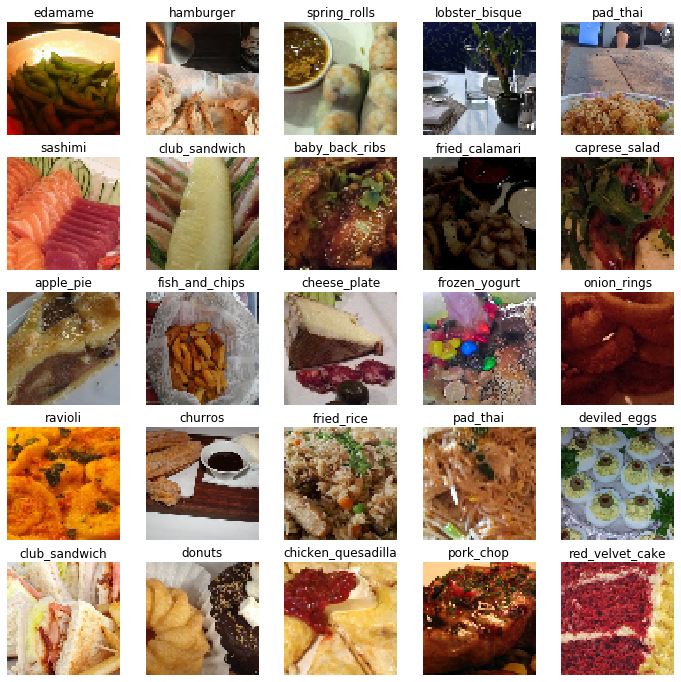

In [4]:
# Displays multiple images
def displayImages(images, categories, indices=slice(0,25), rows=5, cols=5):
    fig, m_ax = plt.subplots(rows, cols, figsize = (12, 12))
    for c_ax, c_label, c_img in zip(m_ax.flatten(), categories[indices], images[indices]):
        c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
        c_ax.axis('off')
        c_ax.set_title(labels[np.argmax(c_label)])

displayImages(X_training, y_training)

In [5]:
def encode(row):
    return np.argwhere(row==True)

def encode_all(categories):
    arr = np.empty([categories.shape[0],1])
    for i in range(np.size(categories,0)):
        arr[i] = encode(categories[i,:])
    return arr

encode_all(y_training)

array([[33.],
       [53.],
       [92.],
       ...,
       [30.],
       [87.],
       [15.]])

In [6]:
def decode_all(encodings, classes=101):
    arr = np.zeros([encodings.shape[0],classes])
    for i in range(np.size(encodings,0)):
        arr[i, int(encodings[i])] = 1
    return arr

np.argwhere(decode_all(encode_all(y_training)[0], 101)==1)
decode_all(encode_all(y_training))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
def to_bool(decodings):
    return decodings.astype(bool)

to_bool(decode_all(encode_all(y_training), 101))[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

# Preparation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

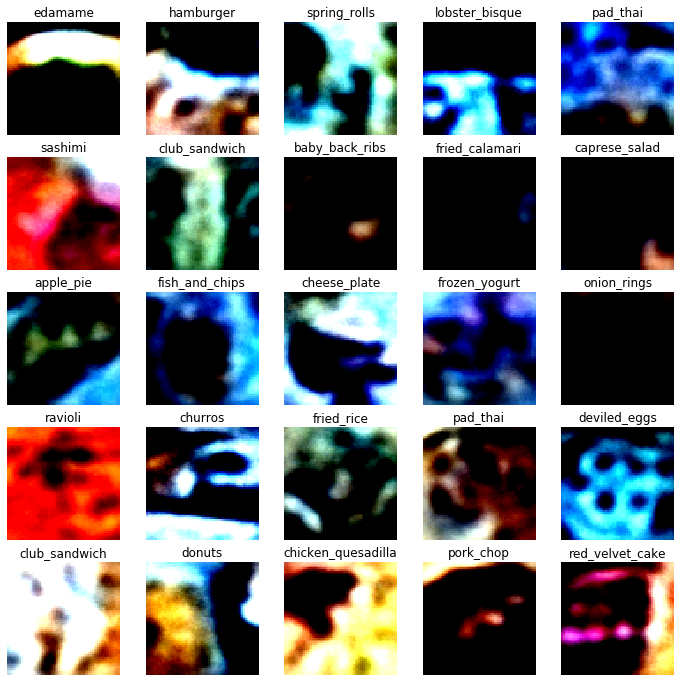

In [8]:
# Scales the data
def RunPCA(principal_components=100):
    from sklearn.preprocessing import StandardScaler

    # Gets the shape as a 2D array
    num = 1
    for i in X_shape:
        num *= i

    # Multi-class problem
    X_scaled_training = X_training.reshape(X_training.shape[0], num).copy().astype(float)
    X_scaled_testing = X_testing.reshape(X_testing.shape[0], num).copy().astype(float)

    # Fits the X data - Multi-class problem
    scaler = StandardScaler()
    scaler.fit(X_scaled_training)

    # Scales the X data - Multi-class problem
    X_scaled_training = scaler.transform(X_scaled_training)
    X_scaled_testing = scaler.transform(X_scaled_testing)

    # Gets the Y data - Multi-class problem
    y_scaled_training = y_training[:,:].copy()
    y_scaled_testing = y_testing[:,:].copy()

    ###################################################################################
    # PCA                                                                             #
    ###################################################################################
    from sklearn.decomposition import PCA

    # Fits the X data
    pca = PCA(n_components=principal_components)
    pca.fit(X_scaled_training)

    # Transforms the data
    X_pca_training = pca.transform(X_scaled_training)
    X_pca_testing = pca.transform(X_scaled_testing)

    # Gets the Y data - Multi-class problem
    y_pca_training = y_scaled_training[:,:].copy()
    y_pca_testing = y_scaled_testing[:,:].copy()

    # Visualize the changes
    X_pca_inverse = pca.inverse_transform(X_pca_training)
    X_pca_inverse = X_pca_inverse.reshape([X_pca_inverse.shape[0], X_shape[0], X_shape[1], X_shape[2]])
    displayImages(X_pca_inverse, y_pca_training)
    
    return X_pca_training, X_pca_testing, y_pca_training, y_pca_testing

# Runs the PCA algorithm with 100 principal components
X_pca_training, X_pca_testing, y_pca_training, y_pca_testing = RunPCA(principal_components=100)

# Classification

In [9]:
# Encodes the y values for the classification functions
y_encoded_training = encode_all(y_pca_training)
y_encoded_testing = encode_all(y_pca_testing)

#### Naive Bayes

In [10]:
###################################################################################
# Naive Bayes                                                                     #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

In [11]:
###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

Expected Accuracy: 0.99%
Actual Accuracy:   4.1000000000000005%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
###################################################################################
# Logistic Regression                                                             #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

C:\Users\iam\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

Expected Accuracy: 0.99%
Actual Accuracy:   4.6%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
###################################################################################
# SVM                                                                             #
###################################################################################
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

In [15]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

Expected Accuracy: 0.99%
Actual Accuracy:   6.7%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [16]:
###################################################################################
# Neural Networks - first try                                                     #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

In [17]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)


Expected Accuracy: 0.99%
Actual Accuracy:   1.0%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
###################################################################################
# Neural Networks - second try                                                    #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   3.2%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

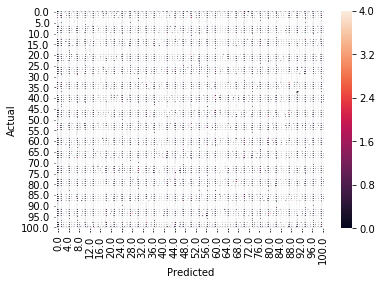

In [38]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)


In [20]:
###################################################################################
# Neural Networks - third try                                                     #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400, 300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   3.2%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

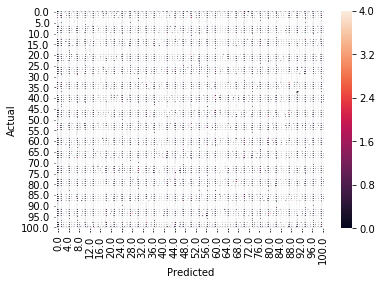

In [37]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [22]:
###################################################################################
# Neural Networks - fourth try                                                    #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400, 300, 400, 300, 400, 300, 400, 300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

In [23]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

Expected Accuracy: 0.99%
Actual Accuracy:   3.2%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
###################################################################################
# Split into train and validation                                                 #
###################################################################################
from sklearn.model_selection import train_test_split
results = train_test_split(X_training, y_encoded_training, test_size=0.2, random_state=0)
X_training_split, X_validation_split, y_training_split, y_validation_split = results

# Prints the size
print("--------------------------------------")
print("Training X Data: ", X_training_split.shape)
print("Training y Data: ", y_training_split.shape) # Changed from y_encoded_training_split
print("--------------------------------------")
print("Validation X Data:  ", X_validation_split.shape)
print("Validation y Data:  ", y_validation_split.shape)
print("--------------------------------------")

--------------------------------------
Training X Data:  (8079, 64, 64, 3)
Training y Data:  (8079, 1)
--------------------------------------
Validation X Data:   (2020, 64, 64, 3)
Validation y Data:   (2020, 1)
--------------------------------------


In [27]:
###################################################################################
# CNN                                                                             #
###################################################################################
# Reference:
#   https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# Converts the values into the 0-1 range
X_float_training = X_training_split / 255
X_float_validation = X_validation_split / 255
X_float_testing = X_testing / 255

# Parameters for the CNN
batch_size = 64
epochs = 20
num_classes = 101

# Sets up the CNN
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compiles the layers
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the layers
fashion_model.summary()

Using TensorFlow backend.








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
____

In [28]:
fashion_train = fashion_model.fit(X_training_split, decode_all(y_training_split), batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_validation_split, decode_all(y_validation_split)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8079 samples, validate on 2020 samples
Epoch 1/20
8079/8079 [==============================] - 49s 6ms/step - loss: 15.9644 - acc: 0.0095 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 2/20
8079/8079 [==============================] - 51s 6ms/step - loss: 15.9625 - acc: 0.0097 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 3/20
8079/8079 [==============================] - 43s 5ms/step - loss: 15.9625 - acc: 0.0097 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 4/20
8079/8079 [==============================] - 41s 5ms/step - loss: 15.9625 - acc: 0.0097 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 5/20
8079/8079 [==============================] - 41s 5ms/step - loss: 15.9625 - acc: 0.0097 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 6/20
8079/8079 [==============================] - 41s 5ms/step - loss: 15.9625 - acc: 0.0097 - val_loss: 15.9426 - val_acc: 0.0109
Epoch 7/20
8079/8079 [=============

In [29]:
fashion_train = fashion_model.fit(X_float_training, decode_all(y_training_split), batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_float_validation, decode_all(y_validation_split)))

Train on 8079 samples, validate on 2020 samples
Epoch 1/20
8079/8079 [==============================] - 41s 5ms/step - loss: 4.6400 - acc: 0.0172 - val_loss: 4.4802 - val_acc: 0.0248
Epoch 2/20
8079/8079 [==============================] - 41s 5ms/step - loss: 4.4485 - acc: 0.0340 - val_loss: 4.3836 - val_acc: 0.0396
Epoch 3/20
8079/8079 [==============================] - 41s 5ms/step - loss: 4.3508 - acc: 0.0494 - val_loss: 4.3152 - val_acc: 0.0579
Epoch 4/20
8079/8079 [==============================] - 41s 5ms/step - loss: 4.2115 - acc: 0.0694 - val_loss: 4.2676 - val_acc: 0.0688
Epoch 5/20
8079/8079 [==============================] - 41s 5ms/step - loss: 4.0678 - acc: 0.0868 - val_loss: 4.1970 - val_acc: 0.0762
Epoch 6/20
8079/8079 [==============================] - 41s 5ms/step - loss: 3.8958 - acc: 0.1090 - val_loss: 4.1750 - val_acc: 0.0876
Epoch 7/20
8079/8079 [==============================] - 41s 5ms/step - loss: 3.7077 - acc: 0.1468 - val_loss: 4.2247 - val_acc: 0.0861
Epoch 8

In [30]:
test_eval = fashion_model.evaluate(X_float_testing, decode_all(y_encoded_testing), verbose=0)
print('Test loss:     ' + str(test_eval[0]))
print('Test accuracy: ' + str(test_eval[1]*100) + "%")

Test loss:     10.998327239990234
Test accuracy: 7.8%


In [31]:
def get_max(row):
    return np.argmax(row)

def map_all(categories):
    arr = np.empty([categories.shape[0],1])
    for i in range(np.size(categories,0)):
        arr[i] = get_max(categories[i,:])
    return arr

predicted_classes = fashion_model.predict(X_float_testing)
best_predictions = map_all(predicted_classes)

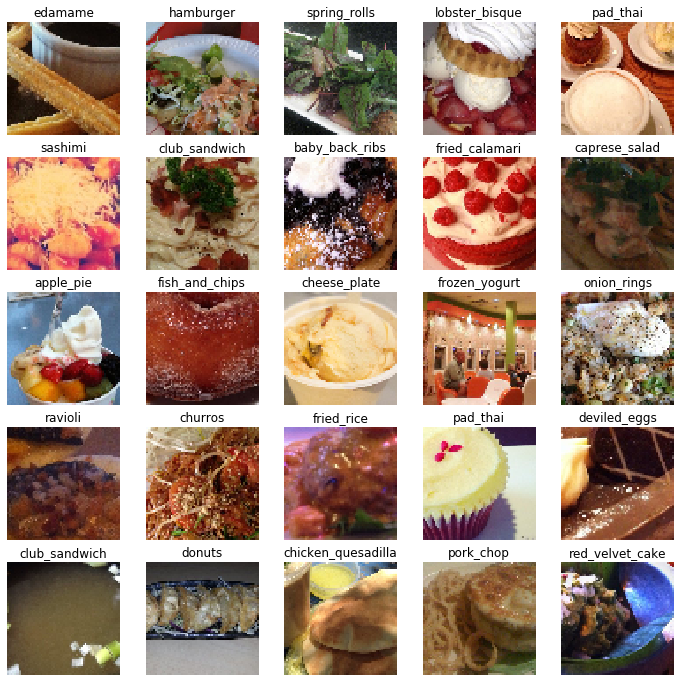

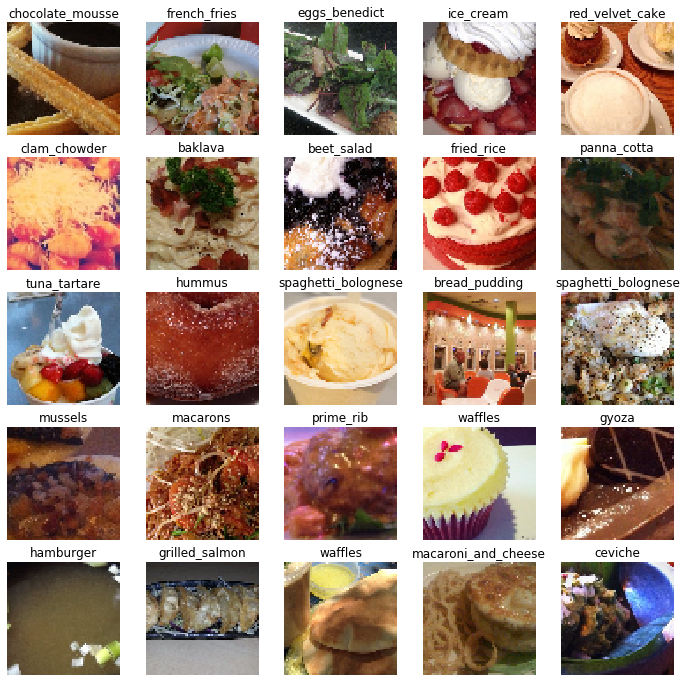

In [32]:
displayImages(X_float_training, to_bool(decode_all(y_encoded_training)))
displayImages(X_float_training, to_bool(decode_all(best_predictions)))